In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#Read data
file_path = "../../dataset/train_val_test_preprocessed.csv"
data = pd.read_csv(file_path)
data.head()


,sentiment,content
0,sadness,im feeling rather rotten im ambitious right
1,sadness,im updating blog feel shitty
2,sadness,never make separate ever want feel like ashamed
3,joy,left bouquet red yellow tulip arm feeling slig...
4,sadness,feeling little vain one


In [22]:
data = data.dropna(subset=['content'])

# Label encode the target variable
le = LabelEncoder()
data['encoded_sentiment'] = le.fit_transform(data['sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['content'], data['encoded_sentiment'], test_size=0.1, random_state=42
)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [23]:
# Initialize and train a Logistic Regression classifier
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_tfidf, y_train)

# Make predictions on the test set
logreg_pred = logreg.predict(X_test_tfidf)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.88      0.81      0.84       266
           1       0.90      0.81      0.85       254
           2       0.86      0.96      0.91       683
           3       0.91      0.69      0.78       156
           4       0.89      0.93      0.91       572
           5       0.92      0.55      0.69        64

    accuracy                           0.88      1995
   macro avg       0.89      0.79      0.83      1995
weighted avg       0.88      0.88      0.88      1995



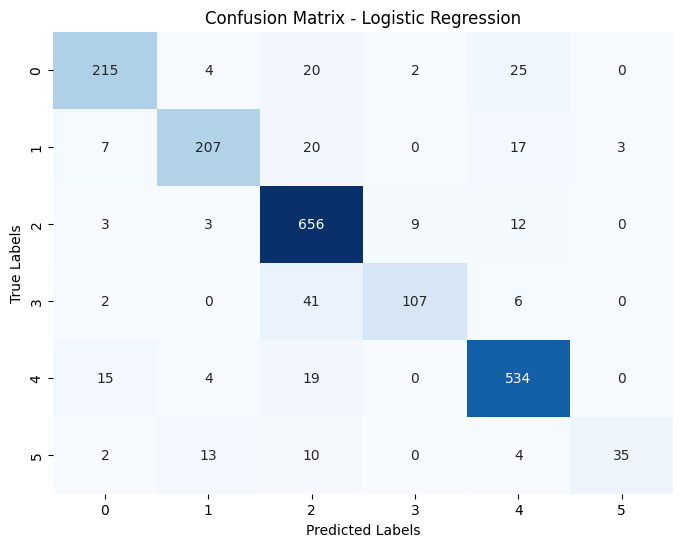

In [24]:
# Print classification report
print(classification_report(y_test, logreg_pred, zero_division='warn'))

# Generate and display confusion matrix
confusion_m = confusion_matrix(y_test, logreg_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [25]:
accuracy = accuracy_score(y_test, logreg_pred)
precision = precision_score(y_test, logreg_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, logreg_pred, average='weighted')
f1 = f1_score(y_test, logreg_pred, average='weighted')

print("Name: Logistic Regression")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1: {:.4f}".format(f1))

Name: Logistic Regression
Accuracy: 0.8792
Precision: 0.8813
Recall: 0.8792
F1: 0.8759
